#**Reinforcement Learning Assignment 06**

Name:**Abhishek Patel**

Enrollment No: **23565001**

Dept: **MFS-AI**

email: **abhishek_p@mfs.iitr.ac.in**

##**Environment**

In [ ]:
import numpy as np
#Enter the sum of digits in your enrollment number as seed
from tqdm.auto import tqdm

def environment(seed):
  np.random.seed(seed)
  p1 = np.random.uniform(0.7,1,1)
  p2 = np.random.uniform(0,0.6,1)
  return p1, p2

epsilon = 0.1
r1 = 2
r2 = 0

#Enter the sum of digits in your enrollment number as seed
seed = 22 # 23565001
p1, p2 = environment(seed)
p1=p1[0]
p2=p2[0]
print('Value of p1:', p1.round(2))
print('Value of p2:', p2.round(2))
print('Value of r1:', r1)
print('Value of r2:', r2)
print('Value of epsilon:', epsilon)

Value of p1: 0.76
Value of p2: 0.29
Value of r1: 2
Value of r2: 0
Value of epsilon: 0.1


##**Question 01**

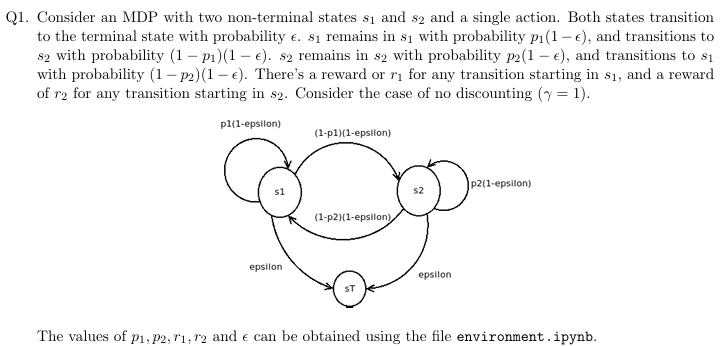

###**Ques 01(a)**

  Generate a large number of episodes (N) for the above MDP. Obtain estimates for value function
 using first visit Monte Carlo ($V_{N}$
 First Visit), second visit Monte Carlo ($V_{N}$
 Second Visit), every visit
 Monte Carlo ($V_{N}$
 Every Visit) and last visit Monte Carlo ($V_{N}$
 Last Visit) (4 points).

In [ ]:

states=['s1','s2']
transition_rewards = {
    's1': {

        'a': [(p1*(1-epsilon), 's1', r1),((1-p1)*(1-epsilon),'s2',r1),
              (epsilon, 'sT', r1)]
    },
    's2': {

         'a': [(p2*(1-epsilon), 's2', r2),((1-p2)*(1-epsilon),'s1',r2),
                (epsilon, 'sT', r2)]
    }


}

In [ ]:
import numpy as np

# Redefine the MDP simulation and Monte Carlo estimation functions
def generate_episode(p1, p2, epsilon, r1, r2):
      current_state = np.random.choice(['s1','s2'])  # Start from random state
      episode=[]
      while current_state != 'sT':
        action='a'
        p=[transition_rewards[current_state][action][i][0] for i in  range(len(transition_rewards[current_state][action]))]
        choice=[i for i in range(len(transition_rewards[current_state][action]))]
        prob, next_state, reward = transition_rewards[current_state][action][np.random.choice(choice,p=p)]

        episode.append((current_state, reward))
        current_state = next_state
      return episode

def first_visit(num_episodes):
  values = {'s1': 0, 's2': 0}  # Values for s1 and s2
  count_={'s1':0,'s2':0}
  for _ in tqdm(range(num_episodes)):
    episode = generate_episode(p1, p2, epsilon, r1, r2)
    returns = {'s1': 0, 's2': 0}  # Returns for s1 and s2
    visited = {'s1': False, 's2': False}
    for (state, reward) in (episode):
      visited[state]=True
      if visited['s1']:
        returns['s1']+=reward
      if visited['s2']:
        returns['s2']+=reward

    count_={state:count_[state]+1 if visited[state]==True else count_[state]+0 for state in states}
    values={state:values[state]+returns[state] for state in states}
  values={state:values[state]/count_[state] for state in states}
  return values

def second_visit(num_episodes):
  values = {'s1': 0, 's2': 0}  # Values for s1 and s2
  count_={'s1':0,'s2':0}
  for _ in tqdm(range(num_episodes)):
    episode = generate_episode(p1, p2, epsilon, r1, r2)
    returns = {'s1': 0, 's2': 0}  # Returns for s1 and s2
    visited = {'s1': 0, 's2': 0}
    for (state, reward) in (episode):
      visited[state]+=1
      if visited['s1']>1:
        returns['s1']+=reward
      if visited['s2']>1:
        returns['s2']+=reward

    count_={state:count_[state]+1 if visited[state]>1 else count_[state]+0 for state in states}
    values={state:values[state]+returns[state] for state in states}
  values={state:values[state]/count_[state] for state in states}
  return values

def every_visit(num_episodes):
  values = {'s1': 0, 's2': 0}  # Values for s1 and s2
  count_={'s1':0,'s2':0}
  for _ in tqdm(range(num_episodes)):
    episode = generate_episode(p1, p2, epsilon, r1, r2)
    returns = {'s1': 0, 's2': 0}  # Returns for s1 and s2
    # visited = {'s1': False, 's2': False}
    count={'s1':0,'s2':0}
    for (state, reward) in (episode):
      count[state]+=1
      returns['s1']+=reward*count['s1']
      returns['s2']+=reward*count['s2']

    count_={state:count_[state]+count[state] for state in states}
    values={state:values[state]+returns[state] for state in states}
  values={state:values[state]/count_[state] for state in states}
  return values

def last_visit(num_episodes):
  values = {'s1': 0, 's2': 0}  # Values for s1 and s2
  count_={'s1':0,'s2':0}
  for _ in tqdm(range(num_episodes)):
    episode = generate_episode(p1, p2, epsilon, r1, r2)
    returns = {'s1': 0, 's2': 0}  # Returns for s1 and s2
    visited = {'s1': False, 's2': False}
    for (state, reward) in reversed(episode):
      if not visited['s1']:
        returns['s1']+=reward
      if not visited['s2']:
        returns['s2']+=reward
      visited[state]=True

    count_={state:count_[state]+1 if visited[state]==True else count_[state]+0 for state in states}
    values={state:values[state]+returns[state]*(1 if visited[state]==True else 0) for state in states}
  values={state:values[state]/count_[state] for state in states}
  return values







# Define parameters and re-run the Monte Carlo estimation
num_episodes = 10_000
print("first_visit monte carlo:")
print(first_visit(num_episodes))

print("\nsecond_visit monte carlo:")
print(second_visit(num_episodes))

print("\nevery_visit monte carlo:")
print(every_visit(num_episodes))

print("\nlast_visit monte carlo:")
print(last_visit(num_episodes))


first_visit monte carlo:


  0%|          | 0/10000 [00:00<?, ?it/s]

{'s1': 15.454214805305948, 's2': 13.363604030823948}

second_visit monte carlo:


  0%|          | 0/10000 [00:00<?, ?it/s]

{'s1': 15.427938461538462, 's2': 13.444654195984212}

every_visit monte carlo:


  0%|          | 0/10000 [00:00<?, ?it/s]

{'s1': 15.689596423557633, 's2': 13.68740924384629}

last_visit monte carlo:


  0%|          | 0/10000 [00:00<?, ?it/s]

{'s1': 2.0, 's2': 4.256843608664604}


###**Ques 1(b)**

Use Bellman’s equation to justify the estimates obtained in part (a) (2 points).

In [ ]:
from sympy import symbols, Eq, solve

def bellman_equations(transition_rewards):
  '''
  Input: transition_rewards

  Output: dictionary containing symbols for states and their corresponding V (value function) values
  '''
  gamma = 1
  # Define symbolic variables
  Vs1, Vs2, Vs3 = symbols('s1 s2 sT')

  # writing bellman's equations for each state
  eq1 = Eq(Vs1, transition_rewards['s1']['a'][0][0]*(transition_rewards['s1']['a'][0][2] + gamma*Vs1) +
           transition_rewards['s1']['a'][1][0]*(transition_rewards['s1']['a'][1][2] + gamma*Vs2) +
           transition_rewards['s1']['a'][2][0]*(transition_rewards['s1']['a'][2][2] + gamma*Vs3))

  eq2 = Eq(Vs2, transition_rewards['s2']['a'][0][0]*(transition_rewards['s2']['a'][0][2] + gamma*Vs2) +
           transition_rewards['s2']['a'][1][0]*(transition_rewards['s2']['a'][1][2] + gamma*Vs1) +
           transition_rewards['s2']['a'][2][0]*(transition_rewards['s2']['a'][2][2] + gamma*Vs3))

  eq3 = Eq(Vs3, 0)

  # Solve the system of equations
  solution = solve((eq1, eq2, eq3), (Vs1, Vs2, Vs3))
  return solution


In [ ]:
print(bellman_equations(transition_rewards))

{s1: 15.5177456259423, s2: 13.4204475239946, sT: 0.0}


##Question 02

**Consider our running example of three states (s1,s2,s3) and two actions (Blue and Red). Pick any
one policy randomly and apply TD(0) algorithm to obtain the value of the picked policy. (4 points).**

In [ ]:
# Setup for the TD(0) simulation

# Parameters
states = ['s1', 's2', 's3']
actions = ['Blue', 'Red']
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
num_episodes = 1000

# Initialize the value function arbitrarily
V = {state: 0.0 for state in states}

# Transition probabilities and rewards (example setup)
# {state: {action: [(prob, next_state, reward)]}}
transition_rewards = {
    's1': {
        'Blue': [(1.0, 's1', 1)],
        'Red': [(0.5, 's1', 0),(0.5,'s2',-1)]
    },
    's2': {
        'Blue': [(1.0, 's1', 2)],
        'Red': [(0.25, 's1', -1),(0.75, 's3', -2)]
    },
    's3': {
        'Blue': [(1.0, 's1', 1)],
        'Red': [(0.5, 's3', 3),(0.5, 's2', 3)]
    }
}

# Define a simple random policy: each action is chosen with equal probability
# policy = {state: actions for state in states}
policy={'s1': 'Red', 's2': 'Blue', 's3': 'Red'}

# Implementing TD(0)

for _ in tqdm(range(num_episodes)):
    state=np.random.choice(states)

    for t in range(100): # assuming episodic task of 100 step to make convergence faster.
      action = policy[state]
      p=[transition_rewards[state][action][i][0] for i in  range(len(transition_rewards[state][action]))]
      choice=[i for i in range(len(transition_rewards[state][action]))]
      prob, next_state, reward = transition_rewards[state][action][np.random.choice(choice,p=p)]
        # TD(0) update
      V[state] =V[state] + alpha * (reward + gamma * V[next_state] - V[state])
      state=next_state

V


  0%|          | 0/1000 [00:00<?, ?it/s]

{'s1': 2.865685055643082, 's2': 4.540797668555042, 's3': 8.617245879828388}

##Question 03

###**Ques 03(a)**
**Consider our running example of three states (s1,s2,s3) and two actions (Blue and Red). Apply the
following algorithms for TD control.**
  
  (a) Q-learning (4 points)

  (b) SARSA (3 points)

  (c) Expected SARSA (3 points)

In [ ]:

from tqdm.auto import tqdm
# Choose an action based on epsilon-greedy policy
def choose_action(state, Q,episode):
    epsilon=1/max(episode,1)
    if np.random.rand() < epsilon:
        return np.random.choice(actions)
    else:
        return max(actions, key=lambda a: Q[(state, a)])

# Q-learning implementation
def Q_learning(Q,num_episodes,timestep):

  for episode in tqdm(range(num_episodes)):
    current_state = np.random.choice(states)
    alpha=1/max(1,episode)
    for t in range(100):
      current_action = choose_action(current_state, Q,episode)
      p=[transition_rewards[current_state][current_action][i][0] for i in  range(len(transition_rewards[current_state][current_action]))]
      choice=[i for i in range(len(transition_rewards[current_state][current_action]))]
      _,next_state, reward = transition_rewards[current_state][current_action][np.random.choice(choice,p=p)]
      # Q-learning update
      next_best_action = max(actions, key=lambda a: Q[(next_state, a)])
      Q[(current_state, current_action)] += alpha * (reward + gamma * max(Q[(next_state, a)] for a in actions) - Q[(current_state, current_action)])
      current_state=next_state
  return Q

# SARSA implementation
def SARSA(Q,num_episodes,timestep):
  for episode in tqdm(range(num_episodes)):
    alpha=1/max(1,episode)
    current_state = np.random.choice(states)
    for t in range(timestep):
      current_action = choose_action(current_state, Q,episode)
      p=[transition_rewards[current_state][current_action][i][0] for i in  range(len(transition_rewards[current_state][current_action]))]
      choice=[i for i in range(len(transition_rewards[current_state][current_action]))]
      _,next_state, reward = transition_rewards[current_state][current_action][np.random.choice(choice,p=p)]
      next_action = choose_action(next_state, Q,episode)
      Q[(current_state, current_action)] += alpha * (reward + gamma * Q[(next_state, next_action)] - Q[(current_state, current_action)])
      current_state=next_state
  return Q

# Expected SARSA implementation
def ExpectedSARSA(Q,num_episodes,timestep):
  current_state = np.random.choice(states)
  for episode in tqdm(range(num_episodes)):
    alpha=1/max(1,episode)
    current_state = np.random.choice(states)
    for t in range(timestep):
      current_action = choose_action(current_state, Q,episode)
      p=[transition_rewards[current_state][current_action][i][0] for i in  range(len(transition_rewards[current_state][current_action]))]
      choice=[i for i in range(len(transition_rewards[current_state][current_action]))]
      _,next_state, reward = transition_rewards[current_state][current_action][np.random.choice(choice,p=p)]
      next_best_action = max(actions, key=lambda a: Q[(next_state, a)])
      n=len(transition_rewards[next_state])
      expected_q=[(1-epsilon+epsilon/n)*Q[(next_state, next_best_action)]+ (epsilon/n)*Q[(next_state,a)] for a in actions if a !=next_best_action]
      Q[(current_state, current_action)] += alpha * (reward + gamma * sum(expected_q) - Q[(current_state, current_action)])
      current_state=next_state
  return Q


In [ ]:


# Constants and environment setup
states = ['s1', 's2', 's3']
actions = ['Blue', 'Red']
gamma = 0.9  # Discount factor
timestep=100
num_episodes = 10_000

# Initialize Q-values arbitrarily
Q_ = {(state, action): 0.0 for state in states for action in actions}


transition_rewards = {
    's1': {
        'Blue': [(1.0, 's1', 1)],
        'Red': [(0.5, 's1', 0),(0.5,'s2',-1)]
    },
    's2': {
        'Blue': [(1.0, 's1', 2)],
        'Red': [(0.25, 's1', -1),(0.75, 's3', -2)]
    },
    's3': {
        'Blue': [(1.0, 's1', 1)],
        'Red': [(0.5, 's3', 3),(0.5, 's2', 3)]
    }
}



#-------------------------------Execution-----------------------#

print("Q Learning......")
output_1=Q_learning(Q_,num_episodes,timestep)
for key, value in output_1.items():
    state, action = key
    print(f"state:{state} action:{action} values:{value:.2f}")

print("\nSARSA.........")

output_2=SARSA(Q_,num_episodes,timestep)
for key, value in output_2.items():
    state, action = key
    print(f"state:{state} action:{action} values:{value:.2f}")


print("\nExpected SARSA.........")
output_3=ExpectedSARSA(Q_,num_episodes,timestep)
for key, value in output_3.items():
    state, action = key
    print(f"state:{state} action:{action} values:{value:.2f}")



Q Learning......


  0%|          | 0/10000 [00:00<?, ?it/s]

state:s1 action:Blue values:10.00
state:s1 action:Red values:8.95
state:s2 action:Blue values:11.00
state:s2 action:Red values:9.89
state:s3 action:Blue values:9.99
state:s3 action:Red values:14.45

SARSA.........


  0%|          | 0/10000 [00:00<?, ?it/s]

state:s1 action:Blue values:10.00
state:s1 action:Red values:8.75
state:s2 action:Blue values:10.99
state:s2 action:Red values:6.81
state:s3 action:Blue values:5.93
state:s3 action:Red values:14.16

Expected SARSA.........


  0%|          | 0/10000 [00:00<?, ?it/s]

state:s1 action:Blue values:9.53
state:s1 action:Red values:8.49
state:s2 action:Blue values:10.53
state:s2 action:Red values:9.91
state:s3 action:Blue values:9.54
state:s3 action:Red values:13.97


###Ques 03(b)

**Pick any policy for prediction and apply TD(λ) using eligibility trace for a randomly picked value of λ.**


Value iteration

In [ ]:
def value_iteration(policy,transition_rewards,states,gamma):
  V_state={state:0.0 for state in states}

  while True:
    V_old_state=V_state.copy()
    for state in states:
      action=policy[state]
      V_state[state]=sum([transition_rewards[state][action][i][0] *
       (transition_rewards[state][action][i][2]+gamma*V_old_state[transition_rewards[state][action][i][1]]) for i in range(len(transition_rewards[state][action]))])
    diff=max([abs(V_state[state]-V_old_state[state]) for state in states])

    if diff<=1e-3:
      break
  return V_state



In [ ]:
def TD(num_episodes,timestep,policy,lambda_):
  V={state:0.0 for state in states}

  for episode in (range(num_episodes)):
    alpha=1/max(1,episode)
    state=np.random.choice(states)
    Z={state:0.0 for state in states}
    visited_state=[]

    for t in range(timestep):
      action = policy[state]
      p=[transition_rewards[state][action][i][0] for i in  range(len(transition_rewards[state][action]))]
      choice=[i for i in range(len(transition_rewards[state][action]))]
      prob, next_state, reward = transition_rewards[state][action][np.random.choice(choice,p=p)]
      delta=reward + gamma* V[next_state]-V[state]
      Z[state]+=1
      visited_state.append(state)
      for s_ in reversed(visited_state):
        V[s_]=V[s_]+alpha*delta*Z[s_]
        Z[s_]=gamma*lambda_*Z[s_]
      state=next_state
  return V



In [ ]:
#Pick any policy for prediction and apply TD(λ) using eligibility trace for a randomly picked value of λ.
states=['s1','s2','s3']
# random value of lambda:
random_lambda_=0.4
num_episodes=1000
gamma=0.9
timestep=10
pol=[1,1,1]
policy={state:'Blue' if pol[states.index(state)]==0 else 'Red' for state in states}
V_random=TD(num_episodes,timestep,policy,random_lambda_)
print(f"Eligibility Trace for randomly picked value of λ={random_lambda_}\n and Policy: {policy}")
print(V_random)


Eligibility Trace for randomly picked value of λ=0.4
 and Policy: {'s1': 'Red', 's2': 'Red', 's3': 'Red'}
{'s1': 3.900201681067661, 's2': 6.0726994957004905, 's3': 10.350046666877544}



 **Plot the error function discussed in slide 8 of lecture 31.**

In [ ]:
states=['s1','s2','s3']
V={state:0.0 for state in states}
Z={state:0.0 for state in states}
pol=[1,1,1]
policy={state:'Blue' if pol[states.index(state)]==0 else 'Red' for state in states}
num_episodes=10000
gamma=0.9
timestep=10

#-----------------------Execution-----------------------#

Error=np.zeros((10,6))
v_pie=value_iteration(policy,transition_rewards,states,gamma)
for i in tqdm(range(10)):
  V_t=[]
  for lambda_ in np.arange(0.0,1.1,0.2):
    V_t.append(TD(num_episodes,timestep,policy,lambda_))
  error=[(sum((v_pie[state]-V_t[i][state])**2 for state in states))**.5 for i in range(len(V_t))]
  Error[i,:]=error




  0%|          | 0/10 [00:00<?, ?it/s]

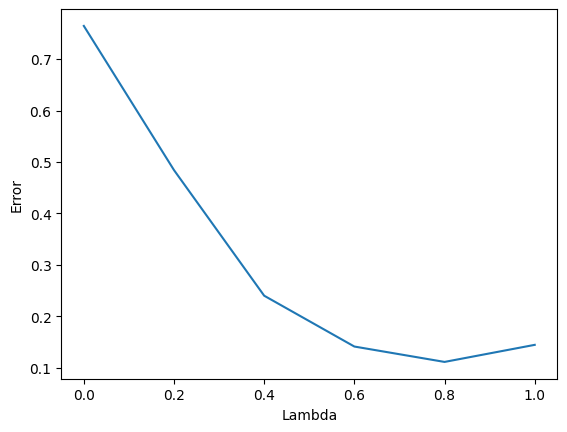

In [ ]:
import matplotlib.pyplot as plt
plt.plot([x for x in np.arange(0,1.1,.2)],Error.mean(axis=0))
plt.xlabel('Lambda')
plt.ylabel('Error')
plt.show()